In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.stem.porter import PorterStemmer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional,RNN,GRU
from sklearn.metrics import precision_score,recall_score,average_precision_score,mean_absolute_error,label_ranking_average_precision_score,f1_score,r2_score,accuracy_score

In [34]:
df=pd.read_csv('BBC News Train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64


Text(0.5, 1.0, 'The Distribution of Category')

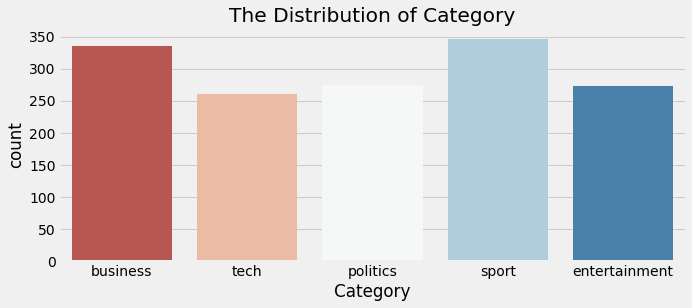

In [35]:
print(df['Category'].value_counts())
sns.countplot(data = df, x = "Category", palette = "RdBu")
plt.title("The Distribution of Category")

In [36]:
df['length'] = df['Text'].apply(len)

(array([919., 482.,  76.,   6.,   3.,   1.,   0.,   2.,   0.,   1.]),
 array([  501. ,  2289.6,  4078.2,  5866.8,  7655.4,  9444. , 11232.6,
        13021.2, 14809.8, 16598.4, 18387. ]),
 <BarContainer object of 10 artists>)

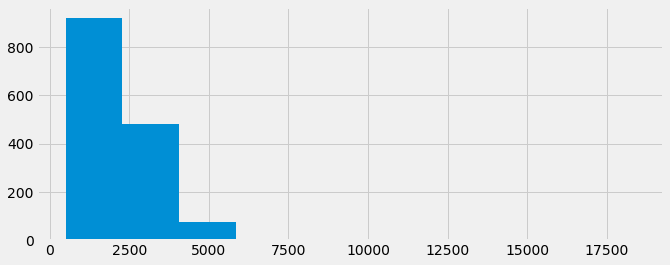

In [37]:
plt.hist(x=df['length'])

In [38]:
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
df['polarity'] = df['Text'].apply(get_polarity)

In [39]:
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
df['subjectivity'] = df['Text'].apply(get_subjectivity)

In [40]:
## lets summarize the Newly Created Features
df[['length','polarity','Text']]

,length,polarity,Text
0,1866,0.023320,worldcom ex-boss launches defence lawyers defe...
1,2016,0.077917,german business confidence slides german busin...
2,3104,0.077754,bbc poll indicates economic gloom citizens in ...
3,3618,0.156109,lifestyle governs mobile choice faster bett...
4,2190,0.009685,enron bosses in $168m payout eighteen former e...
...,...,...,...
1485,1266,0.107292,double eviction from big brother model caprice...
1486,3111,0.221375,dj double act revamp chart show dj duo jk and ...
1487,1370,0.066856,weak dollar hits reuters revenues at media gro...
1488,3242,0.203186,apple ipod family expands market apple has exp...


In [41]:
## lets summarize the Newly Created Features
df[['length','polarity','subjectivity']]

,length,polarity,subjectivity
0,1866,0.023320,0.395125
1,2016,0.077917,0.353854
2,3104,0.077754,0.390688
3,3618,0.156109,0.478536
4,2190,0.009685,0.342117
...,...,...,...
1485,1266,0.107292,0.340278
1486,3111,0.221375,0.458355
1487,1370,0.066856,0.417992
1488,3242,0.203186,0.427091


e:\Important\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Important\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


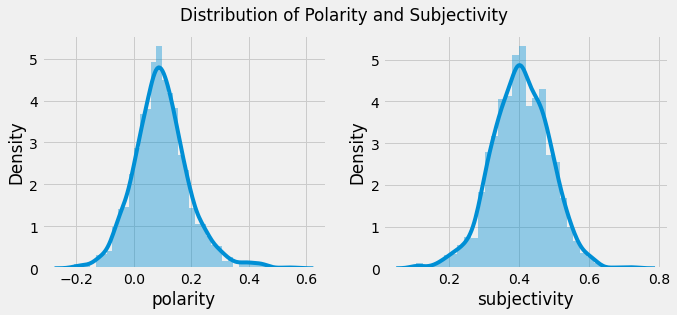

In [42]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(df['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(df['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

e:\Important\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


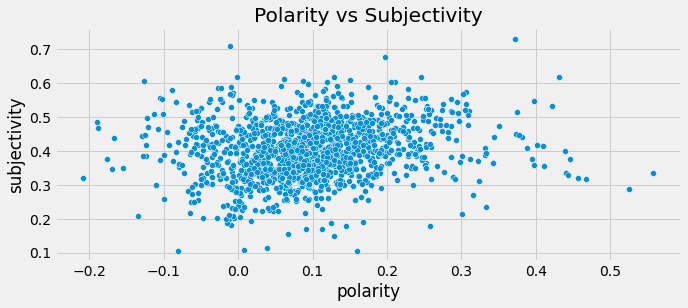

In [43]:
sns.scatterplot(df['polarity'], df['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

<AxesSubplot: >

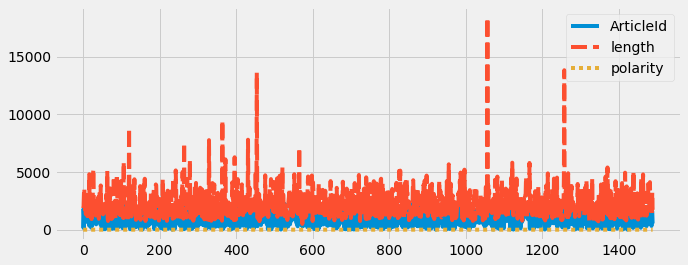

In [44]:
sns.lineplot(data=df.drop(['subjectivity'], axis=1))

<AxesSubplot: >

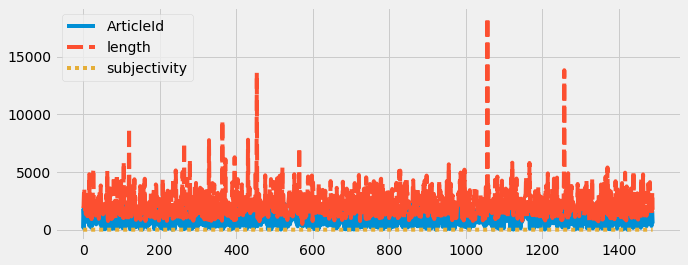

In [45]:
sns.lineplot(data=df.drop(['polarity'], axis=1))

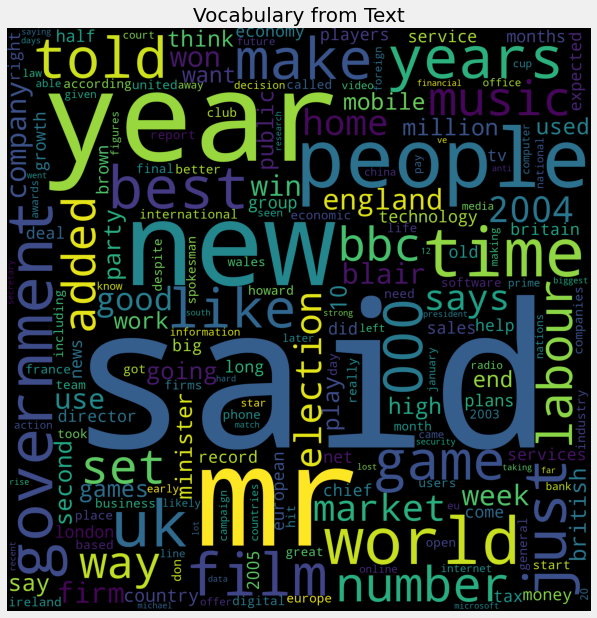

In [46]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['Text'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Text", fontsize = 20)
plt.show()

In [47]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [48]:
#I do aspire here to have balanced classes
num_of_categories = 45000
shuffled = df.reindex(np.random.permutation(df.index))
sport    = shuffled[shuffled['Category'] == 'sport'][:num_of_categories]
business = shuffled[shuffled['Category'] == 'business'][:num_of_categories]
politics = shuffled[shuffled['Category'] == 'politics'][:num_of_categories]
entertainment = shuffled[shuffled['Category'] == 'entertainment'][:num_of_categories]
tech = shuffled[shuffled['Category'] == 'tech'][:num_of_categories]
concated = pd.concat([sport,business,politics,entertainment,tech], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

In [49]:
#One-hot encode the lab
concated.loc[concated['Category'] == 'sport', 'LABEL'] = 0
concated.loc[concated['Category'] == 'business', 'LABEL'] = 1
concated.loc[concated['Category'] == 'politics', 'LABEL'] = 2
concated.loc[concated['Category'] == 'entertainment', 'LABEL'] = 3
concated.loc[concated['Category'] == 'tech', 'LABEL'] = 4
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=5)
print(labels[:10])
if 'Category' in concated.keys():
    concated.drop(['Category'], axis=1)

1459    4
1373    4
7       0
982     3
322     0
1233    4
531     1
165     0
1445    4
46      0
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


In [50]:
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['Text'].values)
sequences = tokenizer.texts_to_sequences(concated['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 24983 unique tokens.


In [51]:
print ("Shape of X:",len(X))

Shape of X: 1490


In [52]:
x_train, x_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

In [53]:
epochs = 50
emb_dim = 128
batch_size = 64
labels[:2]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [54]:
result=pd.DataFrame(columns=['Name of Model','accuracy',"F1-Score","R2-Score","Precision",'Recall','MAE'])
result

,Name of Model,accuracy,F1-Score,R2-Score,Precision,Recall,MAE


In [55]:
def addResult(model_name,model,y_test):
    pred=model.predict(x_test)
    pred=np.argmax(pred, axis=1)
    test=np.argmax(y_test, axis=1)
    result.loc[len(result.index)]=[model_name,
                                    accuracy_score(pred,test),
                                    f1_score(pred,test,average='weighted'),
                                    r2_score(pred,test),
                                    precision_score(pred,test,average='weighted'),
                                    recall_score(pred,test,average='weighted'),
                                    mean_absolute_error(test,pred)]

In [56]:
def plot_model(hist,model_name):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history['val_accuracy'])
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title(model_name+" accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy", "Validation Accuracy", "loss", "Validation Loss"])
    plt.show()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 130, 128)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,123,461
Trainable params: 1,123,461
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
18/18 [=====================

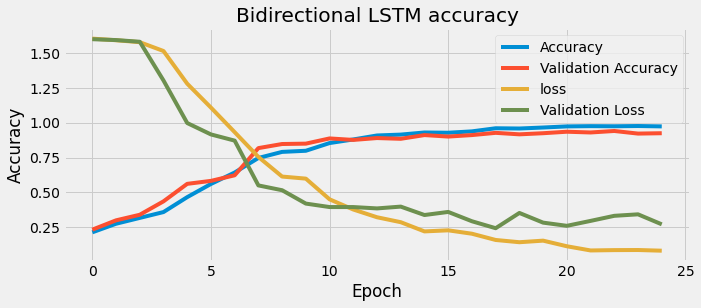

12/12 [==============================] - 2s 94ms/step


In [57]:
def biLSTM():
    model = Sequential()
    model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.7))
    model.add(Bidirectional(LSTM(64, dropout=0.7, recurrent_dropout=0.7)))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(x_train, y_train, validation_data=(x_test,y_test) ,epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.01)])
    accr = model.evaluate(x_test,y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
    plot_model(history,"Bidirectional LSTM")
    addResult("Bidirectional LSTM",model,y_test)

biLSTM()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 130, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,073,733
Trainable params: 1,073,733
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
18/18 [==============================] - 14s 511ms/step - loss: 1.6059 - accuracy: 0.2328 - va

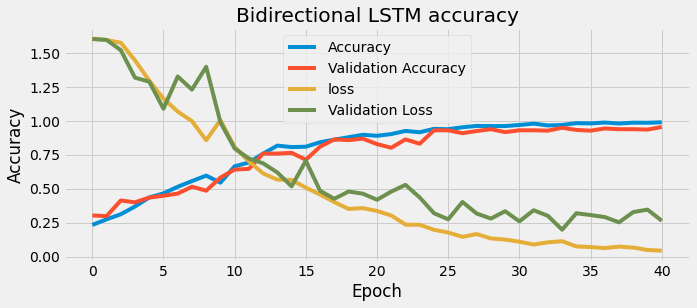

12/12 [==============================] - 1s 47ms/step


In [58]:
def rnn_model():
    model = Sequential()
    model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.7))
    model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(x_train, y_train, validation_data=(x_test,y_test) ,epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.01)])
    accr = model.evaluate(x_test,y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
    plot_model(history,"Bidirectional LSTM")
    addResult("Bidirectional LSTM",model,y_test)
rnn_model()

In [59]:
result

,Name of Model,accuracy,F1-Score,R2-Score,Precision,Recall,MAE
0,Bidirectional LSTM,0.924933,0.924371,0.884652,0.924549,0.924933,0.117962
1,Bidirectional LSTM,0.954424,0.954651,0.910727,0.956753,0.954424,0.077748
